# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
card=pd.read_csv('./data/creditcard.csv')

card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
card.isnull().sum()/len(card)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [19]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    
    return df_copy

In [6]:
def get_train_test_dataset(df):
    df_copy=get_preprocessed_df(df)
    
    X=df_copy.iloc[:,:-1]
    y=df_copy.iloc[:,-1]
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)
    
    return x_train, x_test, y_train, y_test

In [7]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)

In [8]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/len(y_train)*100)

print('\n 테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/len(y_test)*100)

학습 데이터 레이블 값 비율
0    99.827075
1     0.172925
Name: Class, dtype: float64

 테스트 데이터 레이블 값 비율
0    99.827955
1     0.172045
Name: Class, dtype: float64


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, accuracy_score, confusion_matrix

lr_clf=LogisticRegression()
lr_clf.fit(x_train, y_train)

y_pred=lr_clf.predict(x_test)

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\nAccuracy score : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Recall score : {0:.4f}'.format(recall_score(y_test, y_pred)))
print('Precision score : {0:.4f}'.format(precision_score(y_test, y_pred)))
print('F1 score : {0:.4f}'.format(f1_score(y_test, y_pred)))
print('ROC score : {0:.4f}'.format(roc_auc_score(y_test, y_pred)))

Confusion matrix
[[56855     9]
 [   40    58]]

Accuracy score : 0.9991
Recall score : 0.5918
Precision score : 0.8657
F1 score : 0.7030
ROC score : 0.7958


In [10]:
def get_clf_eval(test, pred):
    print('Confusion matrix')
    print(confusion_matrix(test, pred))
    print('\nAccuracy score : {0:.4f}'.format(accuracy_score(test, pred)))
    print('Recall score : {0:.4f}'.format(recall_score(test, pred)))
    print('Precision score : {0:.4f}'.format(precision_score(test,pred)))
    print('F1 score : {0:.4f}'.format(f1_score(test, pred)))
    print('ROC score : {0:.4f}'.format(roc_auc_score(test, pred)))

In [11]:
def model_eval(model, train_features, test_features, train_target, test_target):
    model.fit(train_features, train_target)
    pred=model.predict(test_features)
    get_clf_eval(test_target, pred)

In [13]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=200, num_leaves=64, n_jobs=-1, boost_from_average=False)

model_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Confusion matrix
[[56860     4]
 [   25    73]]

Accuracy score : 0.9995
Recall score : 0.7449
Precision score : 0.9481
F1 score : 0.8343
ROC score : 0.8724


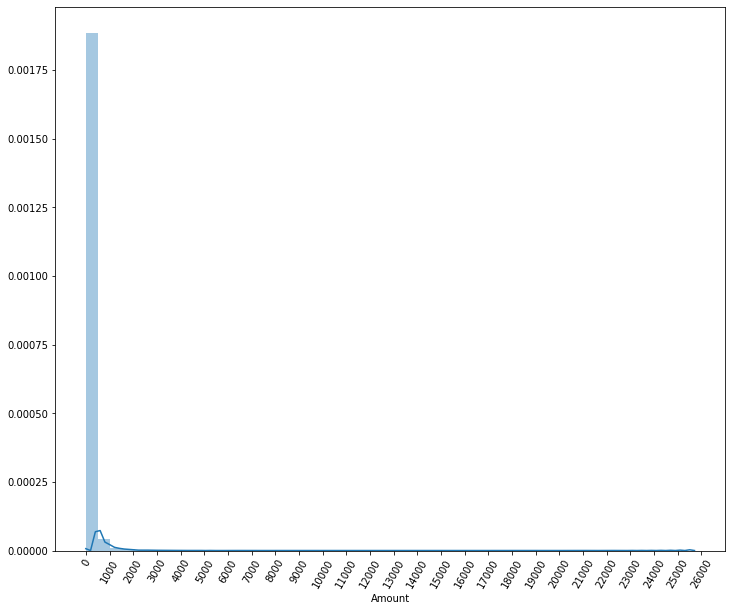

In [14]:
import seaborn as sns

plt.figure(figsize=(12,10))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card['Amount'])

In [15]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df):
    df_copy=df.copy()
    scaler=StandardScaler()
    amount_n=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    df_copy.insert(0,'Amount_Scaled',amount_n) # feature insertion
    
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    return df_copy

In [16]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card)

In [18]:
print('Performance of Logistic Regression')

log_reg=LogisticRegression()
model_eval(log_reg, x_train, x_test, y_train, y_test)

print('\nPerformance of LightGBM Classifier')

lgbm_clf=LGBMClassifier(n_estimators=200, num_leaves=64, n_jobs=-1, boost_from_average=False)
model_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Performance of Logistic Regression
Confusion matrix
[[56853    11]
 [   36    62]]

Accuracy score : 0.9992
Recall score : 0.6327
Precision score : 0.8493
F1 score : 0.7251
ROC score : 0.8162

Performance of LightGBM Classifier
Confusion matrix
[[56860     4]
 [   25    73]]

Accuracy score : 0.9995
Recall score : 0.7449
Precision score : 0.9481
F1 score : 0.8343
ROC score : 0.8724


LGBMClassifier shows more powerful performance than Logistic Regression's one.

In [30]:
# log transformation

def get_log_preprocessed(df):
    df_copy=df.copy()
    amount_log=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_log',amount_log)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

In [31]:
def get_train_test_dataset_log(df):
    df_copy=get_log_preprocessed(df)
    
    X=df_copy.iloc[:,:-1]
    y=df_copy.iloc[:,-1]
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)
    
    return x_train, x_test, y_train, y_test

In [32]:
x_train, x_test, y_train, y_test = get_train_test_dataset_log(card)

In [33]:
print('Performance of Logistic Regression')

log_reg=LogisticRegression()
model_eval(log_reg, x_train, x_test, y_train, y_test)

print('\nPerformance of LightGBM Classifier')

lgbm_clf=LGBMClassifier(n_estimators=200, num_leaves=64, n_jobs=-1, boost_from_average=False)
model_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Performance of Logistic Regression
Confusion matrix
[[56854    10]
 [   36    62]]

Accuracy score : 0.9992
Recall score : 0.6327
Precision score : 0.8611
F1 score : 0.7294
ROC score : 0.8162

Performance of LightGBM Classifier
Confusion matrix
[[56860     4]
 [   25    73]]

Accuracy score : 0.9995
Recall score : 0.7449
Precision score : 0.9481
F1 score : 0.8343
ROC score : 0.8724


There is no big difference between 'StandardScaler' and 'Log Transformation'.

#### Correlation

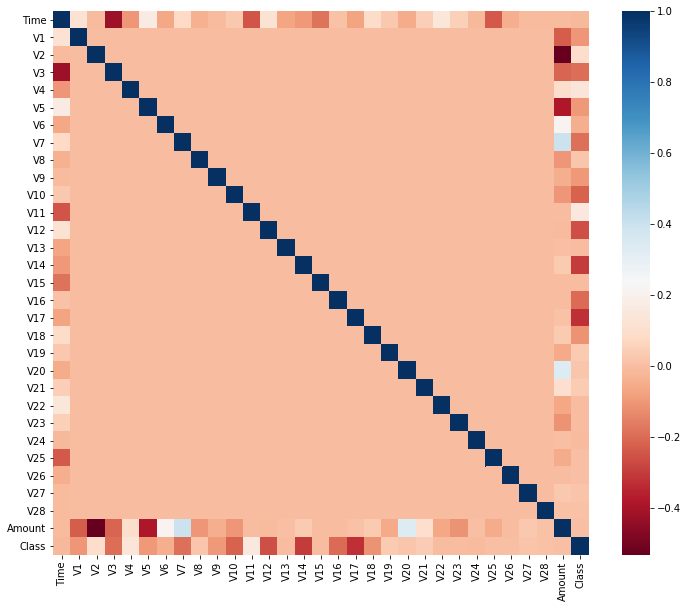

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(card.corr() , cmap='RdBu')

'V14' and 'V17' have high negative correlation with 'Class'.

In [40]:
def get_outlier(df, column, weight):
    fraud=df[df['Class']==1][column]
    
    qt_25=np.percentile(fraud.values, 25)
    qt_75=np.percentile(fraud.values, 75)
    
    iqr=qt_75-qt_25
    iqr_weight=iqr*weight
    
    low_values=qt_25-iqr_weight
    high_values=qt_75+iqr_weight
    
    outlier_index=fraud[(fraud < low_values) | (fraud > high_values)].index
    
    return outlier_index

In [41]:
outlier_index=get_outlier(card, 'V14', 1.5)

print('Outlier index : ', outlier_index)

Outlier index :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [48]:
def func_preprocess(df):
    df_copy=df.copy()
    amount_log=np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_log', amount_log)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    outlier_index=get_outlier(df_copy, 'V14', 1.5)
    
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy.reset_index(drop=True)

In [62]:
def get_dataset(df):
    df_copy=func_preprocess(df)
    
    X=df_copy.iloc[:,:-1]
    y=df_copy.iloc[:,-1]
    
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
    
    return x_train, x_test, y_train, y_test

In [70]:
x_train, x_test, y_train, y_test = get_dataset(card)

In [66]:
print('Performance of Logistic Regression')

log_reg=LogisticRegression()
model_eval(log_reg, x_train, x_test, y_train, y_test)

print('\nPerformance of LightGBM Classifier')

lgbm_clf=LGBMClassifier(n_estimators=200, num_leaves=64, n_jobs=-1, boost_from_average=False)
model_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Performance of Logistic Regression
Confusion matrix
[[56853    10]
 [   34    64]]

Accuracy score : 0.9992
Recall score : 0.6531
Precision score : 0.8649
F1 score : 0.7442
ROC score : 0.8264

Performance of LightGBM Classifier
Confusion matrix
[[56859     4]
 [   18    80]]

Accuracy score : 0.9996
Recall score : 0.8163
Precision score : 0.9524
F1 score : 0.8791
ROC score : 0.9081


When the outliers were removed, all performance improved.

### Oversampling - SMOTE


#### Typically, SMOTE increases Recall score and reduces Precision score.

Good SMOTE packages effectively over sample data so that the recall score increases and the precision score decreases.

---

When doing oversampling, we should increase just training dataset.

In [68]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)

x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [74]:
print('Before SMOTE, Train : {0} , Test : {1}'.format(x_train.shape, y_train.shape))
print('After SMOTE, Train : {0} , Test : {1}'.format(x_train_over.shape, y_train_over.shape))

Before SMOTE, Train : (227842, 29) , Test : (227842,)
After SMOTE, Train : (454904, 29) , Test : (454904,)


In [72]:
y_train.value_counts()

0    227452
1       390
Name: Class, dtype: int64

In [73]:
y_train_over.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

We increase the 'Fraud' case by oversampling.

In [77]:
log_reg=LogisticRegression()

model_eval(log_reg, x_train_over, x_test, y_train_over, y_test)

Confusion matrix
[[55324  1539]
 [   10    88]]

Accuracy score : 0.9728
Recall score : 0.8980
Precision score : 0.0541
F1 score : 0.1020
ROC score : 0.9354


In Logistic Regression, Recall score is increased. On the other hand, precision score is drastically decreased.

Therefore, SMOTE is not good way in this algorithm.

In [78]:
lgbm_clf=LGBMClassifier(n_estimators=200, num_leaves=64, verbose=-1, boost_from_average=False)
model_eval(lgbm_clf, x_train_over, x_test, y_train_over, y_test)

Confusion matrix
[[56853    10]
 [   17    81]]

Accuracy score : 0.9995
Recall score : 0.8265
Precision score : 0.8901
F1 score : 0.8571
ROC score : 0.9132


In LGBM Classifier, Recall score is increased. And precision score is decreased a little.

In this case, SMOTE works well.